In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
%matplotlib inline

## Cross-sectional Estimator

In [7]:
n = 1000 # creating the sample
T = np.random.choice(2, n) #pick numbers randomly from 0 and 1

T[:30]

eps = 0.5*np.random.normal(size=n) # create random numbers

eps[:10]

# here eps and T are independent.
## You may try to make eps and T dependent, for instance:
# eps = 0.5*np.random.normal(size=n) + T
# -- just by adding T to eps makes these dependent.  See what happens!
y = 0.5 + 2*T + eps 
# question: what are true values of alpha and beta?
print(T[:20])
y[:30]

[0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0]


array([ 0.71517854,  1.54697697,  2.48538786,  3.4465099 ,  2.79994933,
        0.35489823,  1.10941583,  0.6842325 ,  1.9295772 ,  1.112502  ,
        0.64622506, -0.34664741,  2.39864115,  2.19278397,  2.97156946,
        0.81170583,  2.12844345, -0.04657711,  0.15565796,  1.18448902,
        2.82669498,  3.58105016,  3.26375048, -0.65253505,  1.99780377,
        2.85452445,  1.51917768, -0.32861509,  0.87573917,  0.91289666])

In [8]:
df = pd.DataFrame({"y" : y, "T" : T })
print(df.head(10))

   T         y
0  0  0.715179
1  1  1.546977
2  1  2.485388
3  1  3.446510
4  1  2.799949
5  0  0.354898
6  0  1.109416
7  0  0.684233
8  1  1.929577
9  0  1.112502


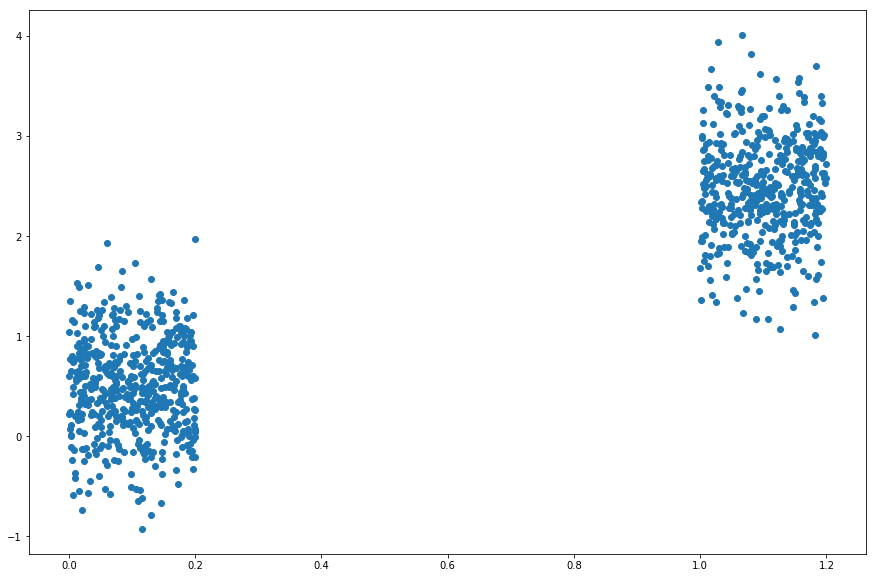

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(df['T'] + 0.2*np.random.uniform(size=n), df['y'])

In [5]:
df.groupby("T").mean()

,y
T,
0,0.504922
1,2.477169


In [6]:
m = smf.ols(formula = "y~T", data=df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     4043.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:49:08   Log-Likelihood:                -704.11
No. Observations:                1000   AIC:                             1412.
Df Residuals:                     998   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5049      0.021     23.644      0.0